In [1]:
import pandas as pd
import numpy as np
import cufflinks as cf
import plotly.offline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
import pandas as pd

df = pd.read_csv('../Loan_default.csv')

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [4]:
df.Status.unique()

array([1, 0])

In [5]:
df.describe()

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,148670.000000,148670.0,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000,124549.000000
mean,99224.500000,2019.0,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445,37.732932
std,42917.476598,0.0,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942,10.545435
min,24890.000000,2019.0,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,62057.250000,2019.0,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000,31.000000
50%,99224.500000,2019.0,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000,39.000000
75%,136391.750000,2019.0,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000,45.000000
max,173559.000000,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


In [6]:

cols_to_drop = [
    "ID",
    "year",
    "loan_limit",
    "open_credit",
    "business_or_commercial",
    "co-applicant_credit_type",
    "construction_type",
    "total_units",
    "Region",
    "Security_Type"
]

# Drop columns safely (ignore if some are missing)
df = df.drop(columns=cols_to_drop, errors='ignore')

print("Remaining columns:", df.columns.tolist())


Remaining columns: ['Gender', 'approv_in_adv', 'loan_type', 'loan_purpose', 'Credit_Worthiness', 'loan_amount', 'rate_of_interest', 'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization', 'interest_only', 'lump_sum_payment', 'property_value', 'occupancy_type', 'Secured_by', 'income', 'credit_type', 'Credit_Score', 'age', 'submission_of_application', 'LTV', 'Status', 'dtir1']


In [7]:

from sklearn.model_selection import train_test_split

# Separate features (X) and target (y) before any processing
X = df.drop('Status', axis=1)
y = df['Status']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=39, stratify=y)

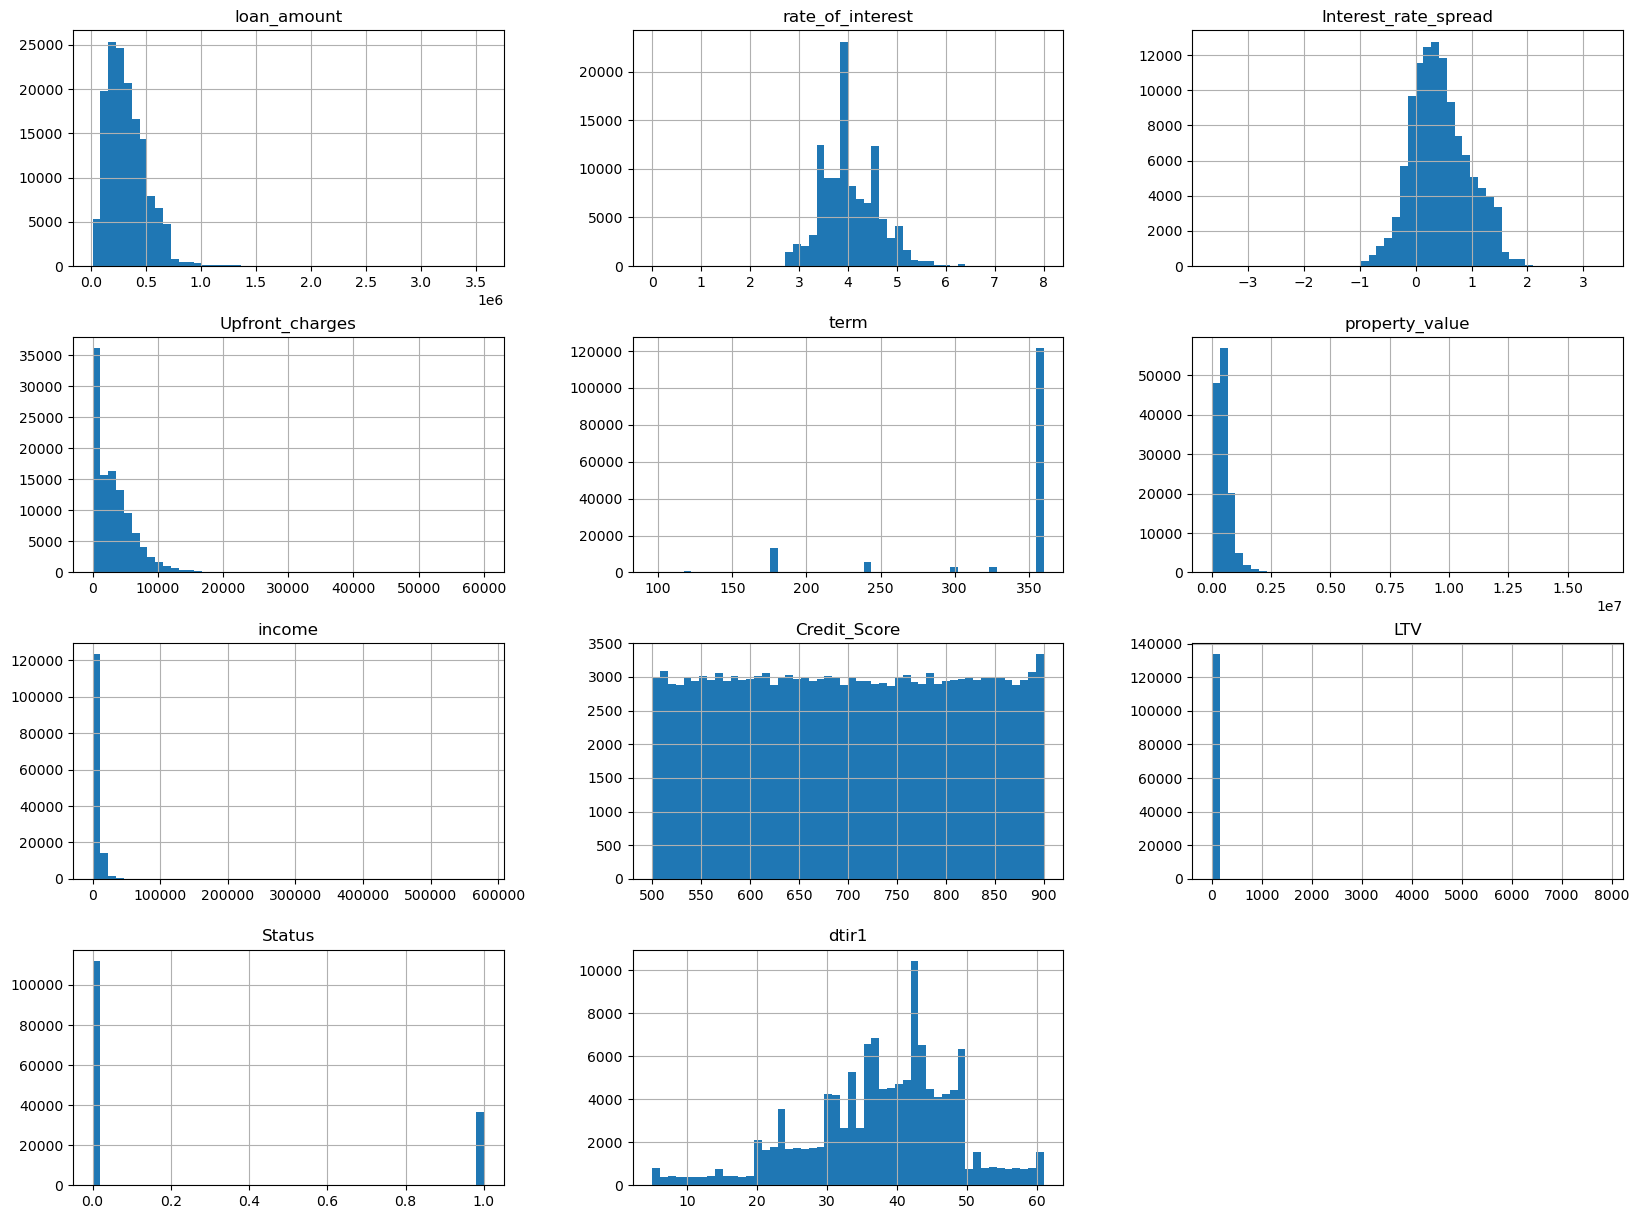

In [8]:
# Numerical data histogram to show the distribution  balance of data and ranges
df.hist(bins = 50, figsize = (20, 15))
plt.show()

In [9]:
df.isnull().sum()

Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
occupancy_type                   0
Secured_by                       0
income                        9150
credit_type                      0
Credit_Score                     0
age                            200
submission_of_application      200
LTV                          15098
Status                           0
dtir1                        24121
dtype: int64

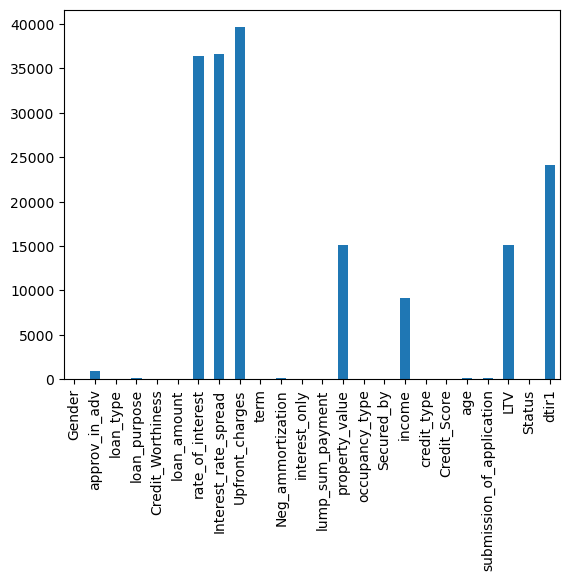

In [10]:
df.isna().sum().plot.bar()
plt.show()

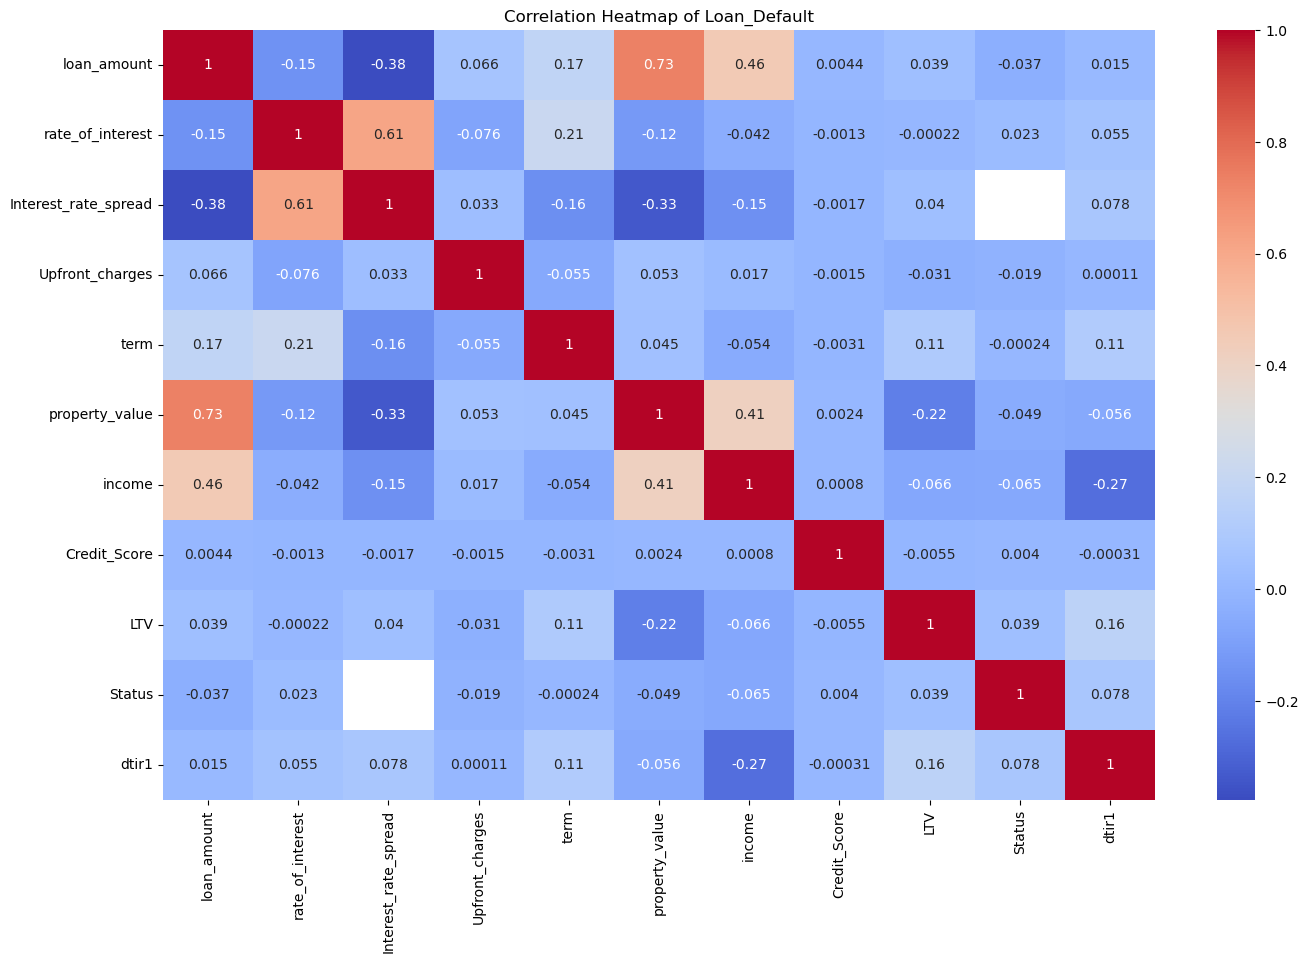

In [11]:
#heat map for the numerical columns

numerical_cols = df.select_dtypes(include=['number'])

correlation_matrix = numerical_cols.corr()


plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Loan_Default')
plt.show()

In [12]:


# --- DEFINE COLUMN TYPES FROM THE TRAINING SET ---
# This ensures we are only working with feature columns

num=[]
for x in X_train.columns:
    if X_train[x].dtype == 'int64' or X_train[x].dtype == 'float64':
        num.append(x)

print("Numerical columns identified:", num)

cat=[]
for x in X_train.columns:
    if X_train[x].dtype == 'object':
        cat.append(x)

print("Categorical columns identified:", cat)

Numerical columns identified: ['loan_amount', 'rate_of_interest', 'Interest_rate_spread', 'Upfront_charges', 'term', 'property_value', 'income', 'Credit_Score', 'LTV', 'dtir1']
Categorical columns identified: ['Gender', 'approv_in_adv', 'loan_type', 'loan_purpose', 'Credit_Worthiness', 'Neg_ammortization', 'interest_only', 'lump_sum_payment', 'occupancy_type', 'Secured_by', 'credit_type', 'age', 'submission_of_application']


In [13]:
#null values numerical
for i in df.columns:
    print(i ,":" ,df[i].unique())

Gender : ['Sex Not Available' 'Male' 'Joint' 'Female']
approv_in_adv : ['nopre' 'pre' nan]
loan_type : ['type1' 'type2' 'type3']
loan_purpose : ['p1' 'p4' 'p3' 'p2' nan]
Credit_Worthiness : ['l1' 'l2']
loan_amount : [ 116500  206500  406500  456500  696500  706500  346500  266500  376500
  436500  136500  466500  226500   76500  356500  156500  586500  306500
  316500  336500  426500  476500  196500  186500  246500  216500  506500
  656500  256500  396500  166500  236500  866500  416500  386500  596500
  606500   86500  286500  146500  446500  636500  486500  326500   56500
  906500  496500  106500  126500  296500  176500 1376500  566500  686500
  556500  676500  366500  276500  716500   66500  616500   96500  826500
   26500  666500  546500  986500  526500 1226500  726500 1486500 1416500
  536500  796500  516500   46500  876500  576500  626500 1506500  886500
  816500  646500  776500  746500  736500  896500  836500  806500 1386500
  976500  926500  786500  766500 1176500 2006500  7565

In [14]:



from sklearn.impute import SimpleImputer

# Impute numerical columns: FIT on train, TRANSFORM on both
median_imputer = SimpleImputer(strategy='median')
X_train[num] = median_imputer.fit_transform(X_train[num])
X_test[num] = median_imputer.transform(X_test[num])

# Impute categorical columns: FIT on train, TRANSFORM on both
for col in cat:
    mode_val = X_train[col].mode()[0]
    X_train[col].fillna(mode_val, inplace=True)
    X_test[col].fillna(mode_val, inplace=True)

C:\Users\pavan\AppData\Local\Temp\ipykernel_3008\3373525199.py:11: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\pavan\AppData\Local\Temp\ipykernel_3008\3373525199.py:12: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [15]:
df[cat].isnull().sum()

Gender                         0
approv_in_adv                908
loan_type                      0
loan_purpose                 134
Credit_Worthiness              0
Neg_ammortization            121
interest_only                  0
lump_sum_payment               0
occupancy_type                 0
Secured_by                     0
credit_type                    0
age                          200
submission_of_application    200
dtype: int64

In [16]:
df[num].isnull().sum()

loan_amount                 0
rate_of_interest        36439
Interest_rate_spread    36639
Upfront_charges         39642
term                       41
property_value          15098
income                   9150
Credit_Score                0
LTV                     15098
dtir1                   24121
dtype: int64

loan_amount                Axes(0.125,0.747241;0.227941x0.132759)
rate_of_interest        Axes(0.398529,0.747241;0.227941x0.132759)
Interest_rate_spread    Axes(0.672059,0.747241;0.227941x0.132759)
Upfront_charges            Axes(0.125,0.587931;0.227941x0.132759)
term                    Axes(0.398529,0.587931;0.227941x0.132759)
property_value          Axes(0.672059,0.587931;0.227941x0.132759)
income                     Axes(0.125,0.428621;0.227941x0.132759)
Credit_Score            Axes(0.398529,0.428621;0.227941x0.132759)
LTV                     Axes(0.672059,0.428621;0.227941x0.132759)
Status                      Axes(0.125,0.26931;0.227941x0.132759)
dtir1                    Axes(0.398529,0.26931;0.227941x0.132759)
dtype: object

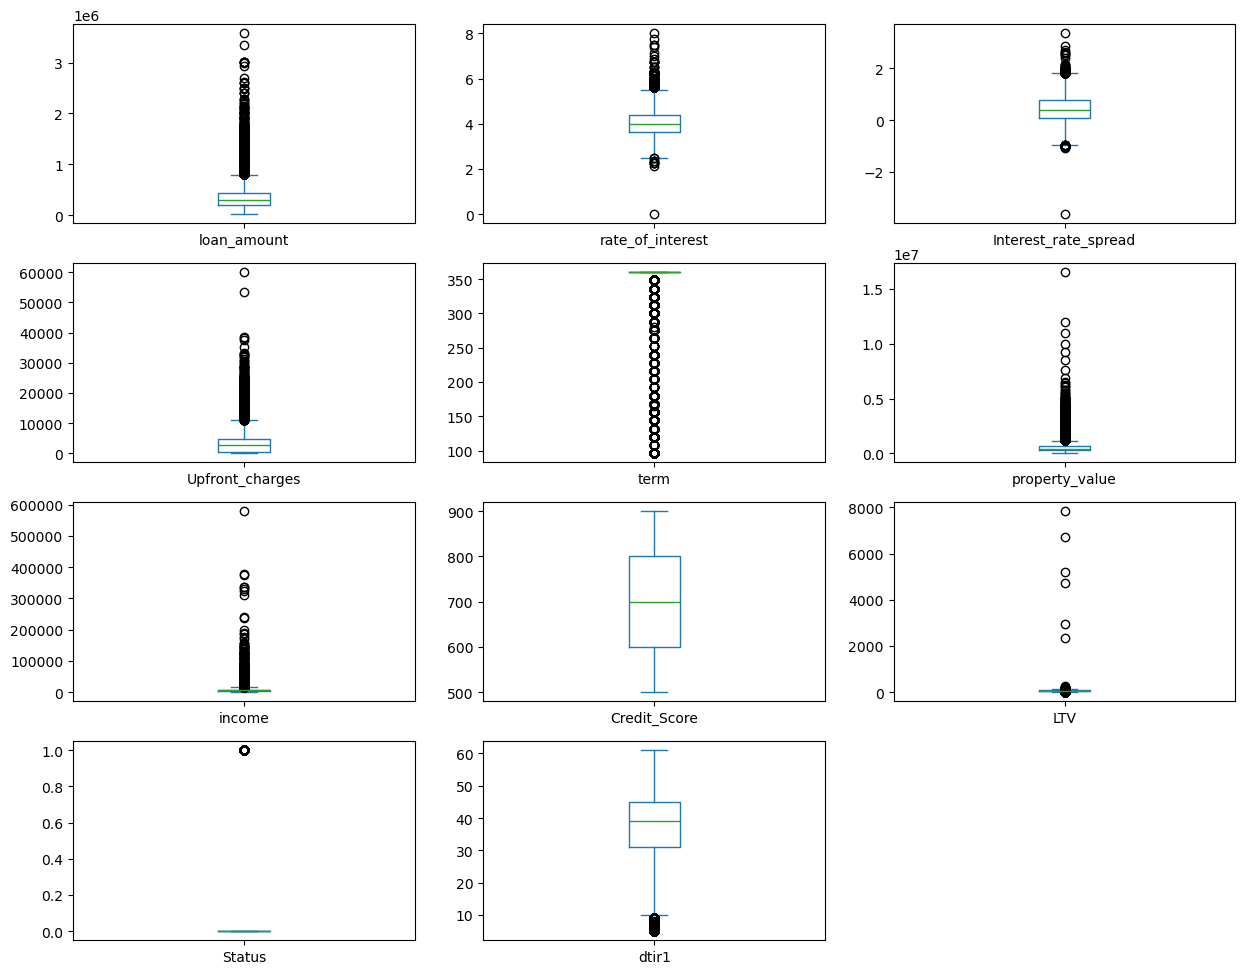

In [17]:
df.plot(kind="box",subplots=True,layout=(5,3),figsize=(15,15))

In [18]:
df.isnull().sum()

Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
occupancy_type                   0
Secured_by                       0
income                        9150
credit_type                      0
Credit_Score                     0
age                            200
submission_of_application      200
LTV                          15098
Status                           0
dtir1                        24121
dtype: int64

In [19]:

# Calculate IQR bounds from the TRAINING data only
Q1 = X_train[num].quantile(0.25)
Q3 = X_train[num].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers in the training set
train_outliers_mask = ~((X_train[num] < lower_bound) | (X_train[num] > upper_bound)).any(axis=1)

# Remove outliers from both X_train and y_train
X_train = X_train[train_outliers_mask]
y_train = y_train[train_outliers_mask]

# Identify and remove outliers from the test set using the SAME bounds
test_outliers_mask = ~((X_test[num] < lower_bound) | (X_test[num] > upper_bound)).any(axis=1)
X_test = X_test[test_outliers_mask]
y_test = y_test[test_outliers_mask]

loan_amount                Axes(0.125,0.747241;0.227941x0.132759)
rate_of_interest        Axes(0.398529,0.747241;0.227941x0.132759)
Interest_rate_spread    Axes(0.672059,0.747241;0.227941x0.132759)
Upfront_charges            Axes(0.125,0.587931;0.227941x0.132759)
term                    Axes(0.398529,0.587931;0.227941x0.132759)
property_value          Axes(0.672059,0.587931;0.227941x0.132759)
income                     Axes(0.125,0.428621;0.227941x0.132759)
Credit_Score            Axes(0.398529,0.428621;0.227941x0.132759)
LTV                     Axes(0.672059,0.428621;0.227941x0.132759)
Status                      Axes(0.125,0.26931;0.227941x0.132759)
dtir1                    Axes(0.398529,0.26931;0.227941x0.132759)
dtype: object

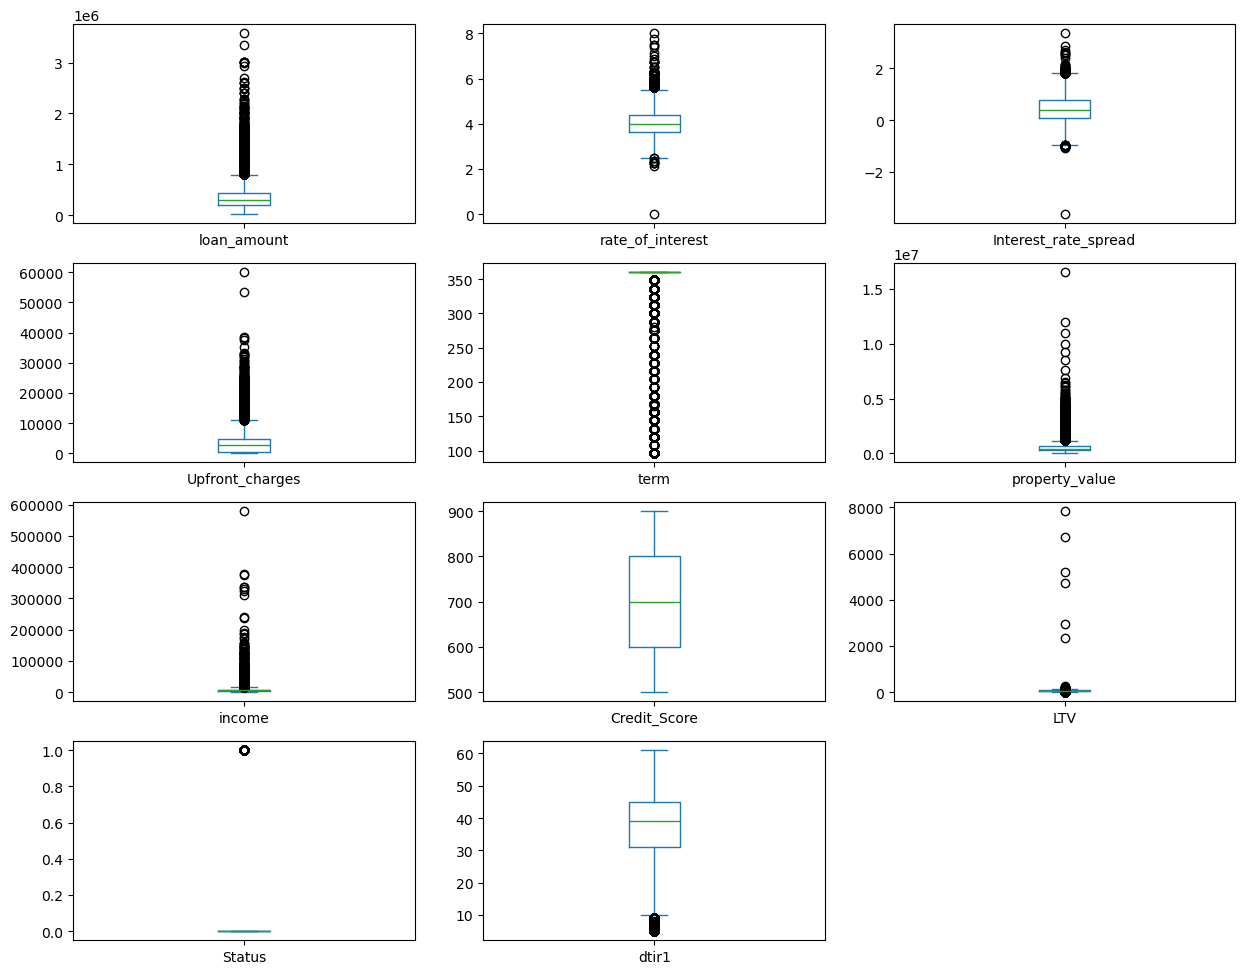

In [20]:
df.plot(kind="box",subplots=True,layout=(5,3),figsize=(15,15))

In [21]:
df.Status.unique()

array([1, 0])

In [22]:

from sklearn.preprocessing import LabelEncoder


X_train = X_train.copy()
X_test = X_test.copy()

for i in cat:
    label = LabelEncoder()

    X_train[i] = label.fit_transform(X_train[i])
    X_test[i] = label.transform(X_test[i])

In [23]:
df

,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,...,occupancy_type,Secured_by,income,credit_type,Credit_Score,age,submission_of_application,LTV,Status,dtir1
0,Sex Not Available,nopre,type1,p1,l1,116500,NaN,NaN,NaN,360.0,...,pr,home,1740.0,EXP,758,25-34,to_inst,98.728814,1,45.0
1,Male,nopre,type2,p1,l1,206500,NaN,NaN,NaN,360.0,...,pr,home,4980.0,EQUI,552,55-64,to_inst,NaN,1,NaN
2,Male,pre,type1,p1,l1,406500,4.560,0.2000,595.00,360.0,...,pr,home,9480.0,EXP,834,35-44,to_inst,80.019685,0,46.0
3,Male,nopre,type1,p4,l1,456500,4.250,0.6810,NaN,360.0,...,pr,home,11880.0,EXP,587,45-54,not_inst,69.376900,0,42.0
4,Joint,pre,type1,p1,l1,696500,4.000,0.3042,0.00,360.0,...,pr,home,10440.0,CRIF,602,25-34,not_inst,91.886544,0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,Sex Not Available,nopre,type1,p3,l1,436500,3.125,0.2571,9960.00,180.0,...,pr,home,7860.0,CIB,659,55-64,to_inst,71.792763,0,48.0
148666,Male,nopre,type1,p1,l1,586500,5.190,0.8544,0.00,360.0,...,ir,home,7140.0,CIB,569,25-34,not_inst,74.428934,0,15.0
148667,Male,nopre,type1,p4,l1,446500,3.125,0.0816,1226.64,180.0,...,pr,home,6900.0,CIB,702,45-54,not_inst,61.332418,0,49.0
148668,Female,nopre,type1,p4,l1,196500,3.500,0.5824,4323.33,180.0,...,pr,home,7140.0,EXP,737,55-64,to_inst,70.683453,0,29.0


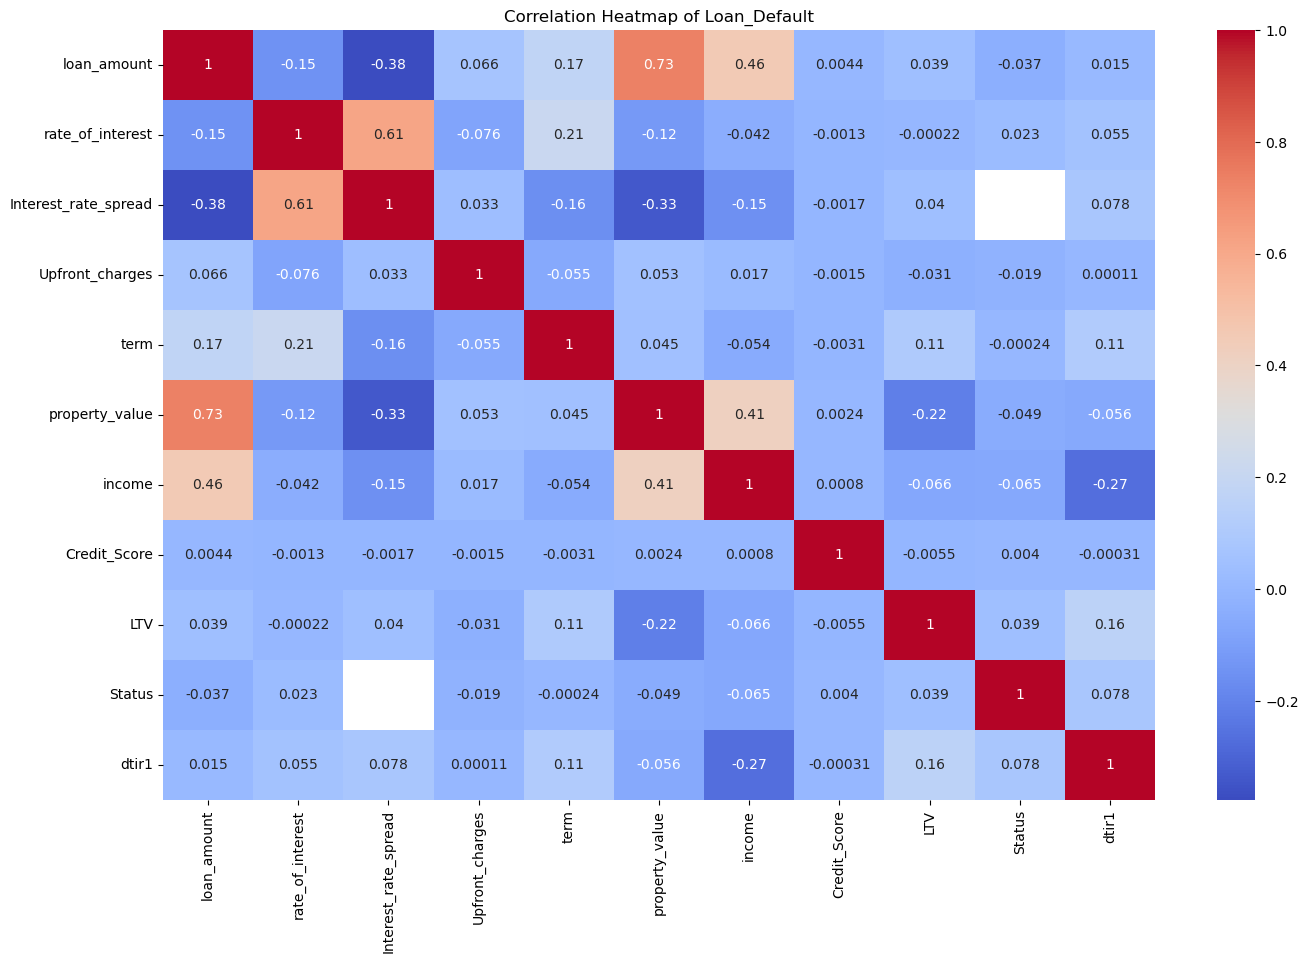

In [24]:
# heatmap for all features after encoding categorical data
numerical_cols = df.select_dtypes(include=['number'])


correlation_matrix = numerical_cols.corr()


plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Loan_Default')
plt.show()

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 24 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Gender                     148670 non-null  object 
 1   approv_in_adv              147762 non-null  object 
 2   loan_type                  148670 non-null  object 
 3   loan_purpose               148536 non-null  object 
 4   Credit_Worthiness          148670 non-null  object 
 5   loan_amount                148670 non-null  int64  
 6   rate_of_interest           112231 non-null  float64
 7   Interest_rate_spread       112031 non-null  float64
 8   Upfront_charges            109028 non-null  float64
 9   term                       148629 non-null  float64
 10  Neg_ammortization          148549 non-null  object 
 11  interest_only              148670 non-null  object 
 12  lump_sum_payment           148670 non-null  object 
 13  property_value             13

In [26]:

column_names = df.columns
print(column_names)


Index(['Gender', 'approv_in_adv', 'loan_type', 'loan_purpose',
       'Credit_Worthiness', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value', 'occupancy_type',
       'Secured_by', 'income', 'credit_type', 'Credit_Score', 'age',
       'submission_of_application', 'LTV', 'Status', 'dtir1'],
      dtype='object')


In [27]:

# Check the data types. There should be NO 'object' types left.
print("Data types in X_train before scaling:")
print(X_train.dtypes)

Data types in X_train before scaling:
Gender                         int64
approv_in_adv                  int64
loan_type                      int64
loan_purpose                   int64
Credit_Worthiness              int64
loan_amount                  float64
rate_of_interest             float64
Interest_rate_spread         float64
Upfront_charges              float64
term                         float64
Neg_ammortization              int64
interest_only                  int64
lump_sum_payment               int64
property_value               float64
occupancy_type                 int64
Secured_by                     int64
income                       float64
credit_type                    int64
Credit_Score                 float64
age                            int64
submission_of_application      int64
LTV                          float64
dtir1                        float64
dtype: object


In [28]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# FIT on training data, TRANSFORM both sets
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
from sklearn.model_selection import train_test_split,cross_val_score
# Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.naive_bayes import GaussianNB ,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve

In [30]:
def eval_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)
    return acc_train, acc_test

In [31]:
#causing some errror . thus not called

def randomstate(x,y):
    maxx=0
    model=LogisticRegression()
    for i in range(1,201):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=i)
        model.fit(X_train,y_train)
        p=model.predict(X_test)
        accu=accuracy_score(p,y_test)
        if accu>maxx:
            maxx=accu
            j=i
    return j

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

def performance(p,ytest,m,xtest,s):
    print('------------------------------------',m,'------------------------------------')
    print('Accuracy',np.round(accuracy_score(p,ytest),4))
    print('----------------------------------------------------------')
    print('Mean of Cross validation Score',np.round(s.mean(),4))
    print('----------------------------------------------------------')
    print('AUC_ROC Score',np.round(roc_auc_score(ytest,m.predict_proba(xtest)[:,1]),4))
    print('----------------------------------------------------------')
    print('Confusion Matrix')
    # Calculate the confusion matrix
    cm = confusion_matrix(p, ytest)
    # Plot the confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    print('----------------------------------------------------------')
    print('Classification Report')
    print(classification_report(p,ytest))

In [33]:
models=[GaussianNB(),KNeighborsClassifier(n_neighbors=10),LogisticRegression(),DecisionTreeClassifier(),
        RandomForestClassifier(),XGBClassifier(),BernoulliNB()]

In [34]:


def createmodel(X_train, y_train, X_test, y_test):

    X_processed_full = np.vstack((X_train, X_test))
    y_processed_full = np.concatenate((y_train, y_test))

    for i in models:
        model=i
        model.fit(X_train,y_train)
        p=model.predict(X_test)


        score=cross_val_score(model, X_processed_full, y_processed_full, cv=5)

        performance(p,y_test,model,X_test,score)